Goals:

Biopython: For calculating GC content, k-mer frequencies, ORFs, and more.


RepeatMasker: To find tandem or interspersed repeats.


HMMER/MEME Suite: For motif and pattern searches.


FASTA Tools: Command-line tools for sequence manipulation and statistics.


Features to target

GC/AT content


K-mer frequencies


Sequence length


Nucleotide skew


ORFs (if it's a coding sequence)


Palindromic sequences


Shannon entropy
Repeats and motifs (with computational tools)

In [7]:
# necessary imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Reshape, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



In [8]:
features_df = pd.read_csv("gene_features/gene_features_3mer.csv")
features_df.columns

Index(['gene_name', 'sequence', 'organism', 'gene_id', 'chromosome', 'regen',
       'sequence_length', 'gc_content', 'at_gc_ratio', 'kmer_3_GGG',
       'kmer_3_GGC', 'kmer_3_GCG', 'kmer_3_CGG', 'kmer_3_GCT', 'kmer_3_CTG',
       'kmer_3_TGC', 'kmer_3_GCC', 'kmer_3_CCG', 'kmer_3_CGC', 'kmer_3_CCA',
       'kmer_3_CAG', 'kmer_3_AGC', 'kmer_3_CCC', 'kmer_3_CTA', 'kmer_3_TAA',
       'kmer_3_AAG', 'kmer_3_AGG', 'kmer_3_CTC', 'kmer_3_TCG', 'kmer_3_GGA',
       'kmer_3_GAG', 'kmer_3_AGA', 'kmer_3_TCT', 'kmer_3_TGT', 'kmer_3_GTT',
       'kmer_3_TTT', 'kmer_3_TTC', 'kmer_3_TCC', 'kmer_3_AGT', 'kmer_3_GTC',
       'kmer_3_GTG', 'kmer_3_TGG', 'kmer_3_CTT', 'kmer_3_TTA', 'kmer_3_AAA',
       'kmer_3_CAC', 'kmer_3_ACT', 'kmer_3_CGT', 'kmer_3_CAA', 'kmer_3_AAT',
       'kmer_3_ATG', 'kmer_3_TAT', 'kmer_3_TGA', 'kmer_3_GAC', 'kmer_3_ACA',
       'kmer_3_TCA', 'kmer_3_CCT', 'kmer_3_ACG', 'kmer_3_GAT', 'kmer_3_ATC',
       'kmer_3_CGA', 'kmer_3_CAT', 'kmer_3_TAC', 'kmer_3_AAC', 'kmer_3_GCA',
      

In [9]:
# Drop gene_name and separate features and target (assuming 'associated' as target column, update as needed)
X = features_df.drop(columns=['gene_name'])
y = (features_df['regen']).astype(int)  # Change this to regen as the target 

# Split the non-numeric data features away from the numeric ones so I can scale only numeric values

X_col = X.columns
print(X_col)

X_numeric_features = ["sequence_length", "gc_content", "at_gc_ratio", 'kmer_3_GGG',
       'kmer_3_GGC', 'kmer_3_GCG', 'kmer_3_CGG', 'kmer_3_GCT', 'kmer_3_CTG',
       'kmer_3_TGC', 'kmer_3_GCC', 'kmer_3_CCG', 'kmer_3_CGC', 'kmer_3_CCA',
       'kmer_3_CAG', 'kmer_3_AGC', 'kmer_3_CCC', 'kmer_3_CTA', 'kmer_3_TAA',
       'kmer_3_AAG', 'kmer_3_AGG', 'kmer_3_CTC', 'kmer_3_TCG', 'kmer_3_GGA',
       'kmer_3_GAG', 'kmer_3_AGA', 'kmer_3_TCT', 'kmer_3_TGT', 'kmer_3_GTT',
       'kmer_3_TTT', 'kmer_3_TTC', 'kmer_3_TCC', 'kmer_3_AGT', 'kmer_3_GTC',
       'kmer_3_GTG', 'kmer_3_TGG', 'kmer_3_CTT', 'kmer_3_TTA', 'kmer_3_AAA',
       'kmer_3_CAC', 'kmer_3_ACT', 'kmer_3_CGT', 'kmer_3_CAA', 'kmer_3_AAT',
       'kmer_3_ATG', 'kmer_3_TAT', 'kmer_3_TGA', 'kmer_3_GAC', 'kmer_3_ACA',
       'kmer_3_TCA', 'kmer_3_CCT', 'kmer_3_ACG', 'kmer_3_GAT', 'kmer_3_ATC',
       'kmer_3_CGA', 'kmer_3_CAT', 'kmer_3_TAC', 'kmer_3_AAC', 'kmer_3_GCA',
       'kmer_3_GAA', 'kmer_3_ACC', 'kmer_3_GGT', 'kmer_3_ATT', 'kmer_3_TTG',
       'kmer_3_ATA', 'kmer_3_GTA', 'kmer_3_TAG', 'kmer_3_CAN', 'kmer_3_ANN',
       'kmer_3_NNN', 'kmer_3_NNT', 'kmer_3_NTA']

X_num = X[X_numeric_features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X = pd.concat([X, X_num], axis=1, join="inner")

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)


Index(['sequence', 'organism', 'gene_id', 'chromosome', 'regen',
       'sequence_length', 'gc_content', 'at_gc_ratio', 'kmer_3_GGG',
       'kmer_3_GGC', 'kmer_3_GCG', 'kmer_3_CGG', 'kmer_3_GCT', 'kmer_3_CTG',
       'kmer_3_TGC', 'kmer_3_GCC', 'kmer_3_CCG', 'kmer_3_CGC', 'kmer_3_CCA',
       'kmer_3_CAG', 'kmer_3_AGC', 'kmer_3_CCC', 'kmer_3_CTA', 'kmer_3_TAA',
       'kmer_3_AAG', 'kmer_3_AGG', 'kmer_3_CTC', 'kmer_3_TCG', 'kmer_3_GGA',
       'kmer_3_GAG', 'kmer_3_AGA', 'kmer_3_TCT', 'kmer_3_TGT', 'kmer_3_GTT',
       'kmer_3_TTT', 'kmer_3_TTC', 'kmer_3_TCC', 'kmer_3_AGT', 'kmer_3_GTC',
       'kmer_3_GTG', 'kmer_3_TGG', 'kmer_3_CTT', 'kmer_3_TTA', 'kmer_3_AAA',
       'kmer_3_CAC', 'kmer_3_ACT', 'kmer_3_CGT', 'kmer_3_CAA', 'kmer_3_AAT',
       'kmer_3_ATG', 'kmer_3_TAT', 'kmer_3_TGA', 'kmer_3_GAC', 'kmer_3_ACA',
       'kmer_3_TCA', 'kmer_3_CCT', 'kmer_3_ACG', 'kmer_3_GAT', 'kmer_3_ATC',
       'kmer_3_CGA', 'kmer_3_CAT', 'kmer_3_TAC', 'kmer_3_AAC', 'kmer_3_GCA',
       'kmer_3_GAA'

In [10]:
print(X_train)
print(Y_train)

[[ 2.76542897  0.96311977  0.89614674 ... -0.07881104 -0.07881104
  -0.07881104]
 [-0.39329192  0.56677001  1.75333391 ... -0.07881104 -0.07881104
  -0.07881104]
 [-0.38643484  1.19226913  0.54291291 ... -0.07881104 -0.07881104
  -0.07881104]
 ...
 [ 2.80766092  1.00420381  0.82613113 ... 12.68857754 12.68857754
  12.68857754]
 [-0.29851177  1.07031006  0.72110999 ... -0.07881104 -0.07881104
  -0.07881104]
 [-0.3985624  -0.98538978 -0.9226418  ... -0.07881104 -0.07881104
  -0.07881104]]
126    0
144    0
54     1
65     1
128    0
      ..
146    0
147    0
116    0
40     1
69     1
Name: regen, Length: 129, dtype: int64


It seems like most of the variance can be captured bu 4 features ! Let us use a 4 feature dataset then

In [11]:
# Define a Model Builder
def build_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',     # Metric to monitor (validation loss in this case)
        patience=3,             # Number of epochs with no improvement after which training stops
        restore_best_weights=True  # Restores model weights from the epoch with the best validation loss
    )

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_model, verbose=0, dropout_rate=0.2)

In [12]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],  # Optimizer choices
    'dropout_rate': [0.2, 0.3, 0.5],  # Dropout rate options
    'batch_size': [32, 64],  # Batch size options
    'epochs': [10, 20]  # Number of epochs to train for
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the training data
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-01 13:52:02.046994: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build

/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py

Best: 0.434109 using {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'optimizer': 'adam'}
Epoch 1/20


/home/shreepatel527/miniconda3/envs/data_project/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4949 - loss: 0.6969 - val_accuracy: 0.5385 - val_loss: 0.6789
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4845 - loss: 0.6930 - val_accuracy: 0.5385 - val_loss: 0.6758
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4970 - loss: 0.6980 - val_accuracy: 0.5385 - val_loss: 0.6719
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5210 - loss: 0.6867 - val_accuracy: 0.5385 - val_loss: 0.6709
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5176 - loss: 0.6938 - val_accuracy: 0.5385 - val_loss: 0.6762
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4644 - loss: 0.6984 - val_accuracy: 0.5385 - val_loss: 0.6800
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4947 - loss: 0.6940 - val_accuracy: 0.5385 - val_loss: 0.6780
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4559 - loss: 0.6963 - val_accuracy: 0.5385 - val_loss: 0.6778
Epoch 9/20

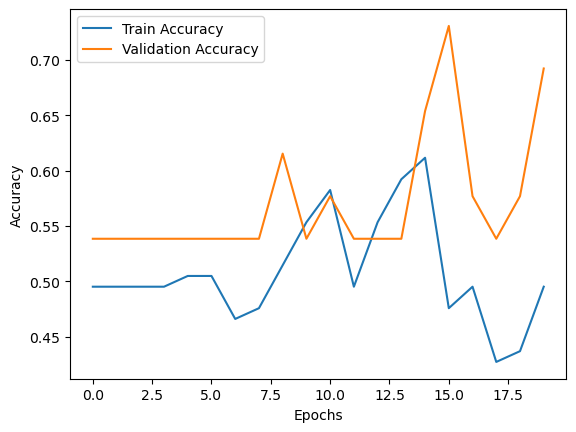

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Test Accuracy: 0.5151515151515151


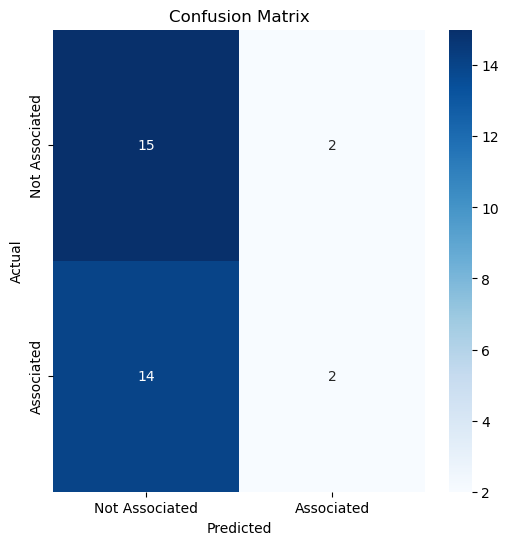

                precision    recall  f1-score   support

Not Associated       0.52      0.88      0.65        17
    Associated       0.50      0.12      0.20        16

      accuracy                           0.52        33
     macro avg       0.51      0.50      0.43        33
  weighted avg       0.51      0.52      0.43        33



In [13]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Use the best model to make predictions
best_model = grid_result.best_params_
# Create the model using the best parameters
model = build_model(dropout_rate=best_model['dropout_rate'],
                     optimizer=best_model['optimizer'])

# Fit the model and get the history
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(Y_test, y_pred_binary))

cm = confusion_matrix(Y_test, y_pred_binary)
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Associated", "Associated"], yticklabels=["Not Associated", "Associated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(Y_test, y_pred_binary, target_names=["Not Associated", "Associated"]))


In [ ]:
pip install shap


PermutationExplainer explainer: 18it [01:29,  5.24s/it]


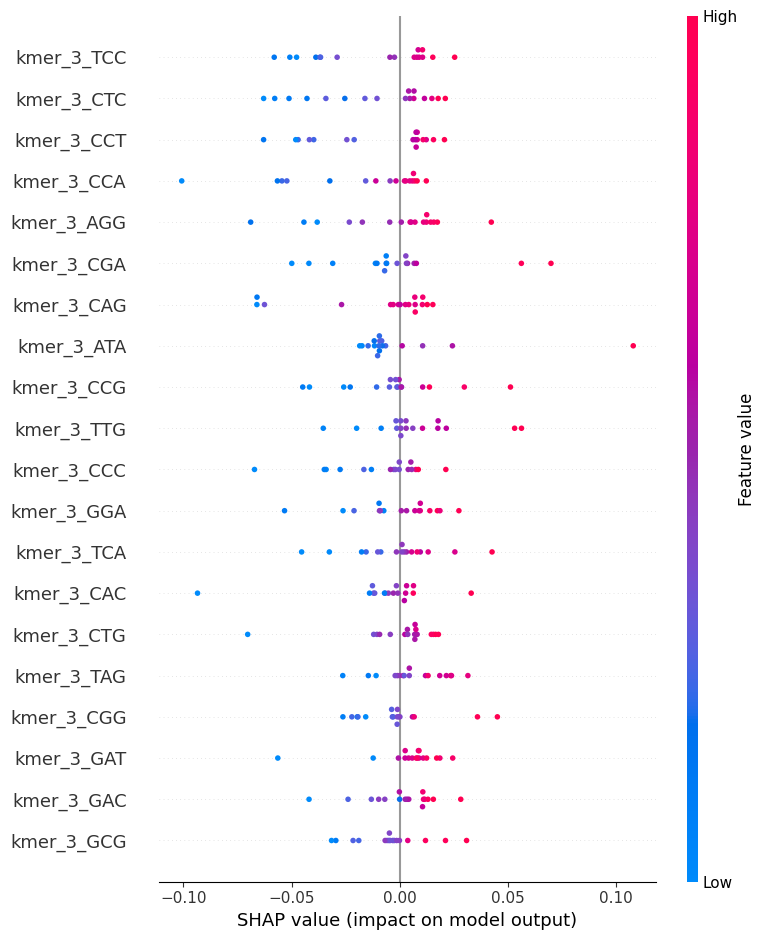

In [ ]:
import shap #to show impactful features we are using

# Create SHAP explainer for your model
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Display summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
